# Integration methods
- Börge Göbel

![Integral](figure_05_integral.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define and plot function

In [2]:
def func(x):
    return 0.5 + 0.1 * x + 0.2 * x**2 + 0.03 * x**3

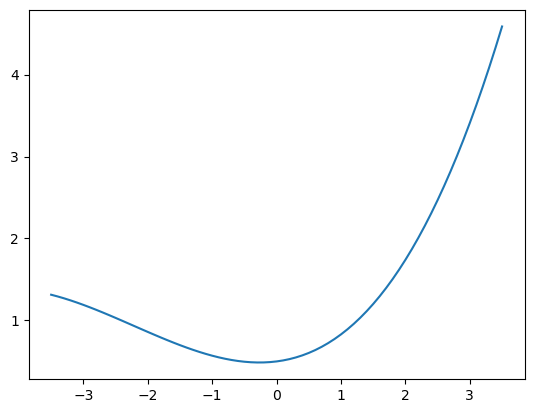

In [3]:
x_list = np.linspace(-3.5, 3.5, 71)
plt.plot(x_list, func(x_list))

### Analytical solution

\\( f(x) = \frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3 \\)

\\( A = \int_{-3}^3 f(x)\,\mathrm{d}x = \int_{-3}^3\left(\frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3\right)\,\mathrm{d}x = \left[\frac{1}{2}x + \frac{1}{20}x^2 + \frac{1}{15}x^3 + \frac{3}{400}x^4\right]_{-3}^3\\)

In [4]:
( 1/2*(3) + 1/20*(3)**2 + 1/15*(3)**3 + 3/400*(3)**4 ) - ( 1/2*(-3) + 1/20*(-3)**2 + 1/15*(-3)**3 + 3/400*(-3)**4 )

6.6

### Create data

In [5]:
x_points = np.linspace(-3,3,13)
data = np.array([x_points, func(x_points)])

In [6]:
data

array([[-3.     , -2.5    , -2.     , -1.5    , -1.     , -0.5    ,
         0.     ,  0.5    ,  1.     ,  1.5    ,  2.     ,  2.5    ,
         3.     ],
       [ 1.19   ,  1.03125,  0.86   ,  0.69875,  0.57   ,  0.49625,
         0.5    ,  0.60375,  0.83   ,  1.20125,  1.74   ,  2.46875,
         3.41   ]])

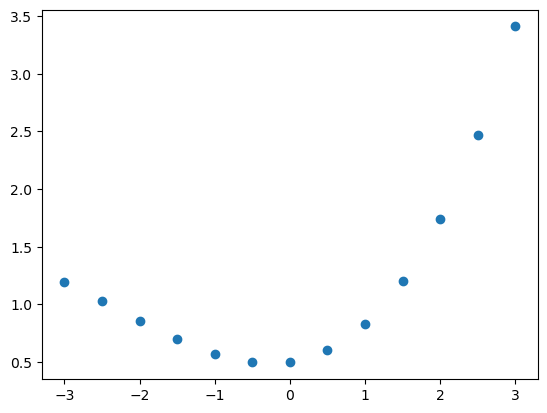

In [7]:
plt.scatter(data[0], data[1])

## 1. Weighted sum

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n-1}\sum_{i=1}^n f(x_i)\\)

Edges are problematic, as they are overrepresented. Furthermore, this only really works if the data is equidistant.

In [8]:
def integralSum(data):
    return np.sum(data[1]) * (data[0, -1] - data[0,0]) / (len(data[1]) - 1)

In [9]:
integralSum(data)

7.800000000000001

## 2. Trapezoidal method 

Corresponds to integrating a linear spline through the data points. It is now possible to properly deal with non-equidistant data.

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \sum_{i=1}^{n-1} \frac{f(x_{i+1})+f(x_{i})}{2}(x_{i+1}-x_i)\\)

In [10]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) - 1):
        a = a + ( data[1,i+1] + data[1,i]) / 2 * ( data[0,i+1] - data[0,i] )
    return a

In [11]:
integralTrapezoidal(data)

6.650000000000001

For equidistant data this simplfies to 

\\( A \approx \frac{b-a}{n-1}\left[\frac{1}{2}f(x_1) + \sum_{i=2}^{n-1} f(x_i) + \frac{1}{2}f(x_n)\right] \\)

Therefore the edge issue is resolved.

In [17]:
def integralTrapezoidalEQ(data):
    return ( 1/2*data[1,0] + np.sum(data[1,1:-1]) + 1/2*data[1,-1] ) * (data[0, -1] - data[0,0]) / (len(data[1]) - 1)

In [18]:
integralTrapezoidalEQ(data)

6.650000000000001

## 3. Simpson rule & Newton-Cortes equations

This method corresponds to integrating a polynomial interpolation function through the data points. The coefficients have been optimized accordingly.

### Simpson rule

Careful! This method works only if there are an odd number of data points.

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n-1} \left[ \frac{1}{3}f(x_1) + \frac{4}{3}f(x_2) + \frac{2}{3}f(x_3) + \frac{4}{3}f(x_4) + \dots + \frac{4}{3}f(x_{n-3}) + \frac{2}{3}f(x_{n-2}) + \frac{4}{3}f(x_{n-1}) + \frac{1}{3}f(x_n) \right]\\)

In [23]:
def integralSimpson(data):
    return (1/3*data[1,0] + 4/3*np.sum(data[1,1:-1:2]) + 2/3*np.sum(data[1,2:-1:2]) + 1/3*data[1,-1]) \
* (data[0, -1] - data[0,0]) / (len(data[1]) - 1)

In [24]:
integralSimpson(data)

6.599999999999999

We get the perfect result, because our data has been generated using a 3rd-order polynomial. This is also what the Simpson rule considers for the interpolation.

### Higher-order Newton-Cortes equations 

There exist many more optimized methods, e.g. Boole's rule:

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \\\approx \frac{b-a}{n-1} \left[ \frac{14}{45}f(x_1) + \frac{64}{45}f(x_2) + \frac{24}{45}f(x_3) + \frac{64}{45}f(x_4) + \frac{28}{45}f(x_5) + \frac{64}{45}f(x_6) + \frac{24}{45}f(x_7) \dots + \frac{64}{45}f(x_{n-3}) + \frac{24}{45}f(x_{n-2}) + \frac{64}{45}f(x_{n-1}) + \frac{14}{45}f(x_n) \right]\\)

For this rule, the number of data points has to be a multiple of 5.

More information: https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas